# Salaries in Science


#### Kayla Wen, Colin Chen, Paria Sokhanran, Justin Leung 

## Part I: Introduction
The decision of what to study in university is an undeniable challenge many students encounter. Most students value stability; therefore, they aim to complete their degree and obtain a well-paying job post-graduation. Our group is interested in investigating the correlation between compensation and employment rates of various industries. Therefore, we aim to answer the following question: What is the relationship between salaries and employment rates? This question stemmed from our hypothesis that industries with higher salaries have lower employment rates due to their lack of funding for more employees. To accomplish this, we will use a data set taken from Kaggle, which includes multiple files with information about individuals’ majors, grades, career prospects, and other personal information such as age. 

## Part II: Preliminary Exploratory Data Analysis

In [74]:
#Run this cell first

library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 15)


#### Reading the Data Set

In [75]:
## reads the data of the average salary of graduates with a certain degree and major
data <- read_csv(file = "https://raw.githubusercontent.com/colin-c/Salaries-in-Science/main/data/all-ages.csv") |>
    mutate(Employment_rate = 1 - Unemployment_rate) 

data

Rows: 173 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Major, Major_category
dbl (10): index, Major_code, Total, Employed, Employed_full_time_year_round,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.02614711,50000,34000,80000,0.9738529
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.02863606,54000,36000,80000,0.9713639
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.03024832,63000,40000,98000,0.9697517
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.04267890,46000,30000,72000,0.9573211
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.04918845,62000,38500,90000,0.9508116
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.03179089,50000,35000,75000,0.9682091
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.05086705,63000,39400,88000,0.9491329
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.03923042,52000,35000,75000,0.9607696
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


#### Spliting the data set into Training and Testing

In [76]:
## splits data into training and testing
data_split <- initial_split(data, prop = 0.75, strata = NULL)
data_training <- training(data_split)
data_testing <- testing(data_split)

data_training
data_testing

index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,2401,AEROSPACE ENGINEERING,Engineering,65734,44944,38491,1969,0.04197131,80000,58000,110000,0.9580287
60,2499,MISCELLANEOUS ENGINEERING,Engineering,57006,43906,37194,2744,0.05882101,70000,50000,100000,0.9411790
73,3301,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,1098647,708882,482229,52248,0.06864530,50000,32900,75000,0.9313547
91,3701,APPLIED MATHEMATICS,Computers & Mathematics,19112,15136,12109,892,0.05565261,70000,47000,106000,0.9443474
142,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,504657,379980,266671,30330,0.07391972,46600,32000,70000,0.9260803
27,2303,SCHOOL STUDENT COUNSELING,Education,2396,1492,1093,169,0.10174594,41000,33200,50000,0.8982541
53,2413,MATERIALS ENGINEERING AND MATERIALS SCIENCE,Engineering,21430,14687,11871,933,0.05973111,78000,55000,105000,0.9402689
63,2502,ELECTRICAL ENGINEERING TECHNOLOGY,Engineering,94697,73737,64157,4572,0.05838409,67000,46900,91000,0.9416159
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.03923042,52000,35000,75000,0.9607696
9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.04256333,58000,40500,80000,0.9574367
13,1901,COMMUNICATIONS,Communications & Journalism,987676,790696,595739,54390,0.06436031,50000,35000,80000,0.9356397
16,1904,ADVERTISING AND PUBLIC RELATIONS,Communications & Journalism,186829,147433,111552,10624,0.06721626,50000,34000,75000,0.9327837
17,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,62141,49609,37261,4609,0.08500867,50000,34500,75000,0.9149913
19,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,29317,22828,18747,2265,0.09026422,60000,40000,85000,0.9097358
22,2106,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,Computers & Mathematics,39362,32366,28156,2626,0.07504572,55000,40000,80000,0.9249543
26,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,4037,3113,2468,0,0.00000000,58000,44750,79000,1.0000000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


#### Summarizing data sets

In [77]:
## summarizes the data sets for only relevant columns
data_training <- data_training |>
    select(Employment_rate, Median, P25th, P75th)

data_training

Employment_rate,Median,P25th,P75th
<dbl>,<dbl>,<dbl>,<dbl>
0.9580287,80000,58000,110000
0.9411790,70000,50000,100000
0.9313547,50000,32900,75000
0.9443474,70000,47000,106000
0.9260803,46600,32000,70000
0.8982541,41000,33200,50000
0.9402689,78000,55000,105000
0.9416159,67000,46900,91000
⋮,⋮,⋮,⋮


#### Plot for Employment Rate vs Median Salary

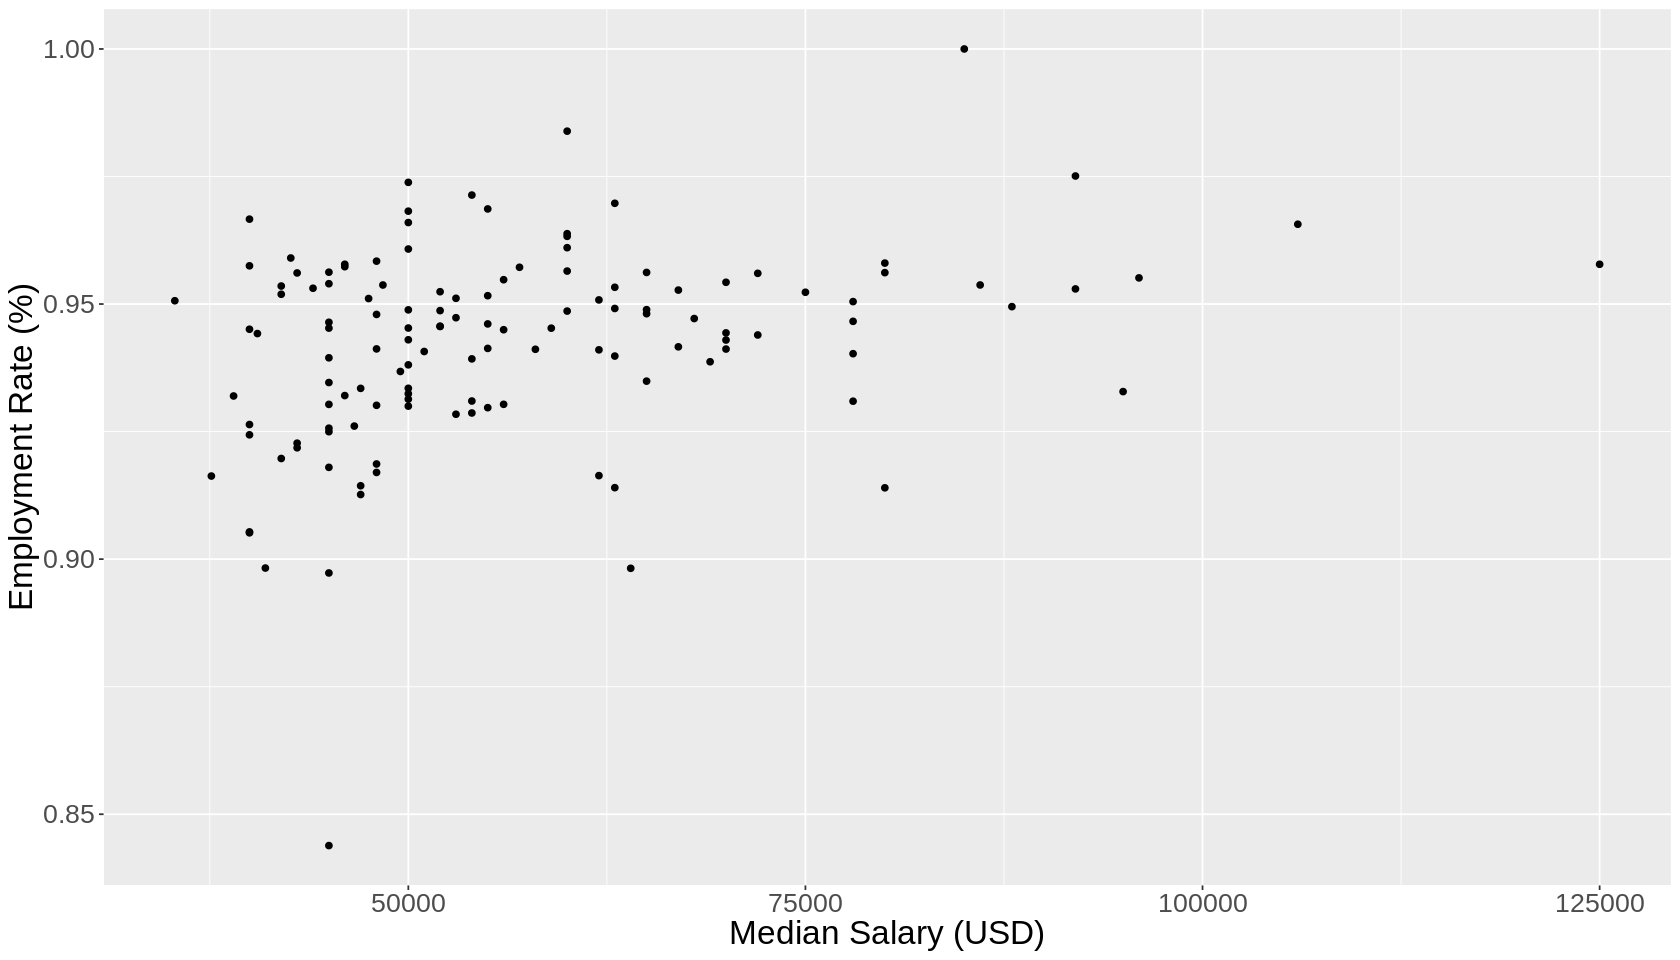

In [78]:
plotmedian <- data_training |>
    ggplot(aes(x = Median, y = Employment_rate)) +
    geom_point() +
    labs(x = "Median Salary (USD)", y = "Employment Rate (%)") +
    theme(text = element_text(size=20))

plotmedian 

#### Plot for Employment Rate vs 25th Percentile Salary

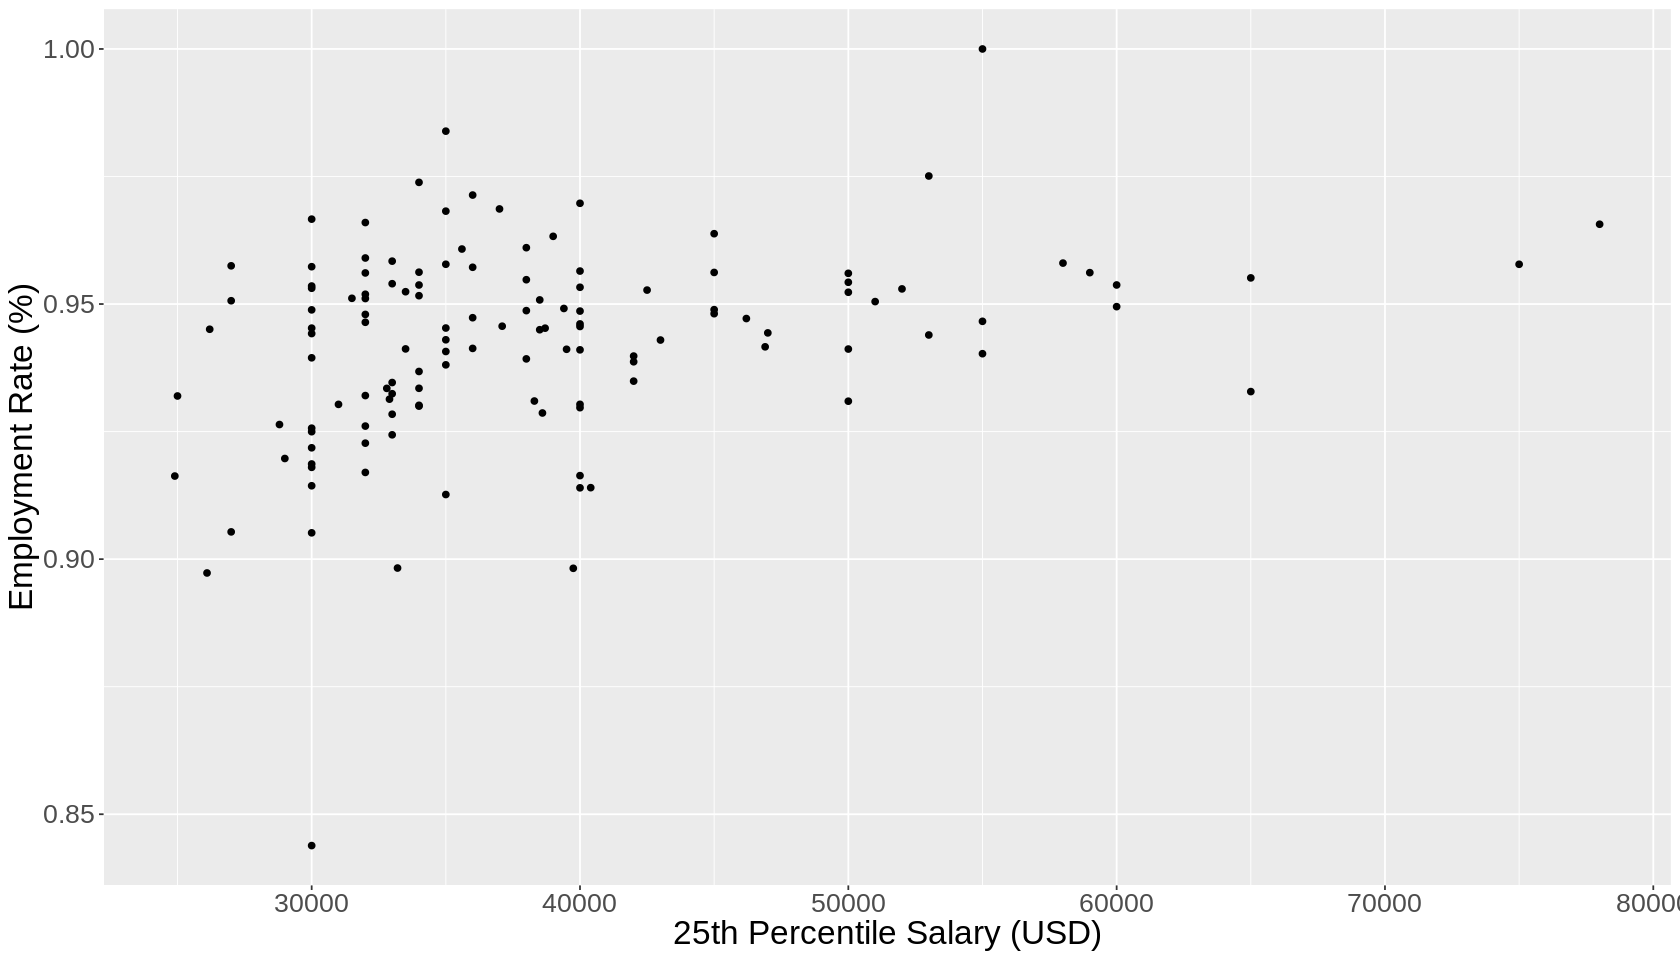

In [79]:
plot25 <- data_training |>
    ggplot(aes(x = P25th, y = Employment_rate)) +
    geom_point() +
    labs(x = "25th Percentile Salary (USD)", y = "Employment Rate (%)") +
    theme(text = element_text(size=20))

plot25

#### Plot for Employment Rate vs 75th Percentile Salary

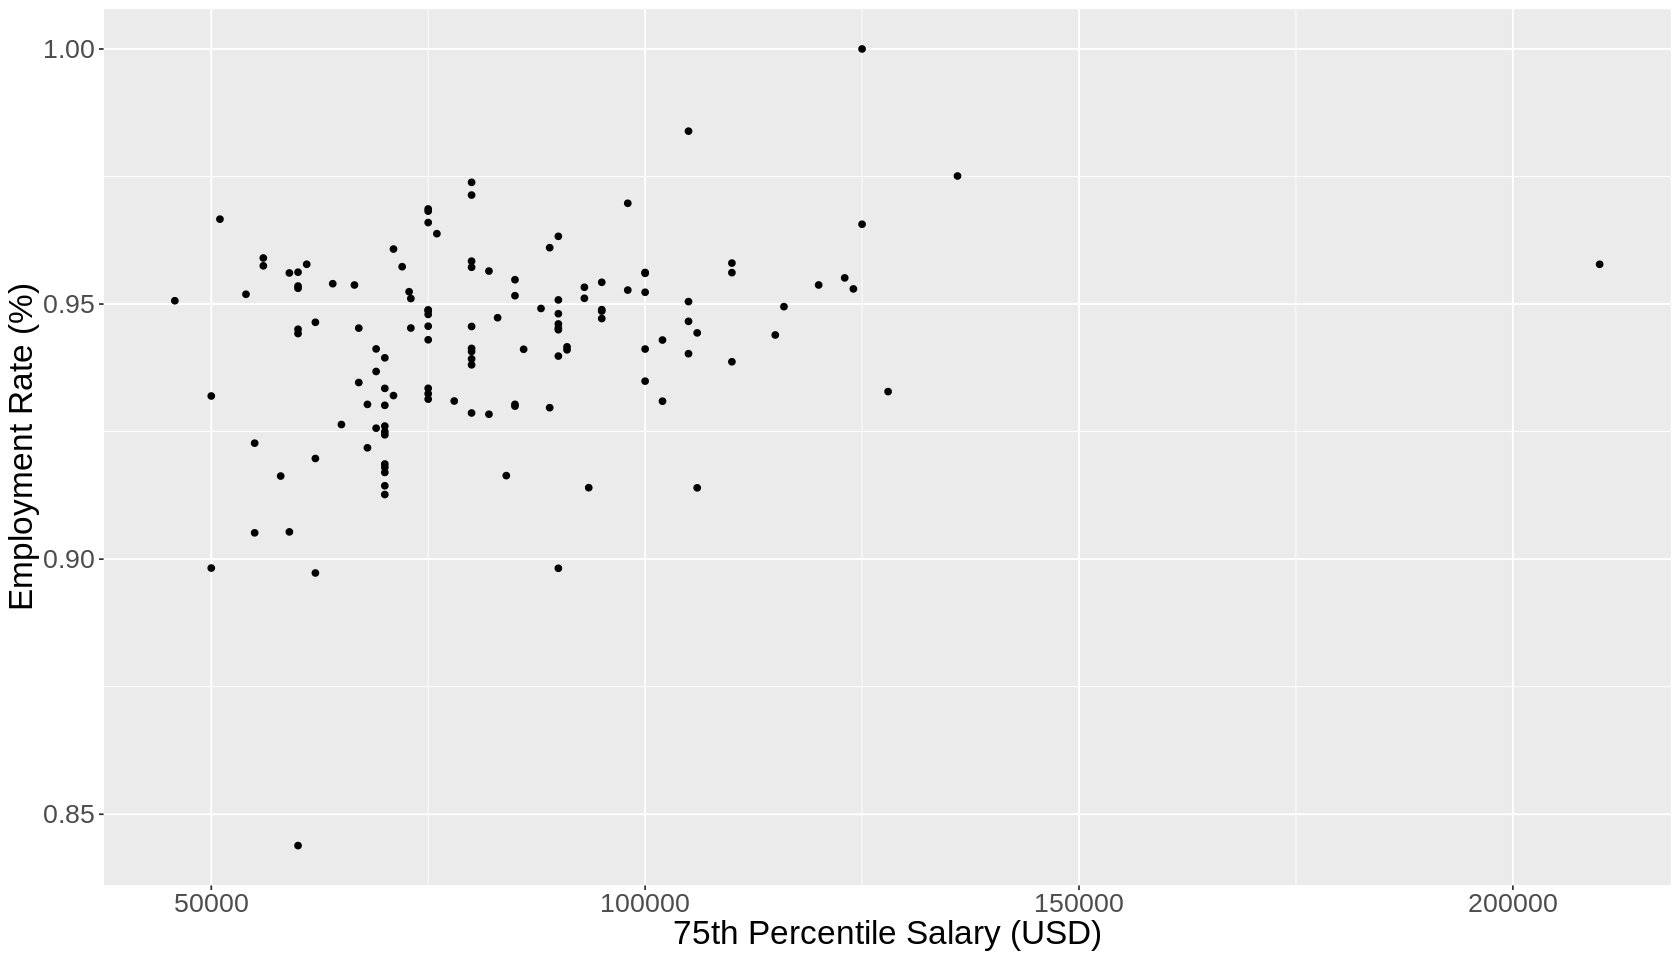

In [80]:
plot75 <- data_training |>
    ggplot(aes(x = P75th, y = Employment_rate)) +
    geom_point() +
    labs(x = "75th Percentile Salary (USD)", y = "Employment Rate (%)") +
    theme(text = element_text(size=20))

plot75 

## Part III: Methods
We will conduct our data analysis using the techniques and functions from the worksheets and tutorial sets and expect much of our coding to be based on the content we have learned throughout the course. We are using a dataset from Kaggle, which we intend to mainly use the information from the columns “Major”, “Median”, “P25th”, and “P75th”. To visualize our findings, we will be creating 3 scatter plots. For each of the plots, the y-axis will be labeled “Employment Rate”, representing the percentage of graduates employed in each of the majors, and the x-axis will be labeled “Median Salary (USD)”, “25th Percentile Salary (USD)”, and “75th Percentile Salary (USD)”. Including the data from the columns “P25th” and “P75th” will enable us to provide a more comprehensive perspective on the relationship between the salary of each graduated major and their respective employment rate. Through the use of regression techniques, we can determine any existing significance that exists between salaries and employment rates and gain further insight into their relationship. Additionally, we will use cross-validation to determine the most appropriate K neighbors value and to improve the accuracy of our model. 


## Part IV: Expected Outcomes and Significance

Our analysis aims to investigate the relationship between salary and employment rate, anticipating that higher-paying jobs may exhibit lower employment rates. We hypothesize that the availability of higher-paying positions within a particular field could be limited, leading to a lower overall employment rate. This expectation is based on the premise that higher salary levels often correspond to positions requiring specialized skills or qualifications, resulting in a more competitive job market. Job seekers would also tend to apply for these higher-paying careers, resulting in highly competitive applications and leaving many unemployed. Companies that supply such a high salary may also be unable to open up a large quantity of the position leading to increased selectivity in their hiring process. By examining the correlation between salary and employment rate, we seek to uncover valuable insights into the dynamics of job opportunities and their relationship to compensation levels. Understanding this relationship holds significant implications for individuals pursuing their education and seeking career paths with optimal employment prospects. As for the future outlook, recognizing the correlation between salary and employment rate can help students make informed decisions about their majors and field of study alongside their passions.



### Citiation

College majors and their graduates. Kaggle. (n.d.). https://www.kaggle.com/datasets/thedevastator/uncovering-insights-to-college-majors-and-their?resource=download&amp;select=all-ages.csv 